# All about Color

> Esta guía está hecha en base a lo que he ido usando durante el tiempo, si encuentras algo que según tu criterio es interesante de utilizar y no lo he incluido POR FAVOR házmelo saber para agregarlo a mi toolkit diario de gráficos 🥺

Debo confesar que pierdo mucho tiempo customizando mis gráficos y probando diferes opciones para mostrar mis análisis . Lo más triste de esto es que **siempre** olvido la sintaxis de lo que uso y reviso las mismas páginas una y otra vez 😔. Eso me ha motivado a hacer una guía sobre todo aquello que ocupo a diario para plotear gráficos con estilo 💅🏻

Este notebook en particular es un resumen sobre tods los colores disponibles...el cielo es el límite. 🌈

Una compañera mi equipo que es UX (Grande Su!!)💕 me recomendó esta página para revisar esquemas de colores:

  > ->  [link](https://coolors.co/browser/) Pd: entra bajo tu propio riesgo


## Liberías utilizadas

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib as mpl

In [10]:
#El dataset es el mismo que en All about Graph
data =  sns.load_dataset("tips")
data.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

## Paletas Base

Todo lo que es gestión del color viene heredado directamente de matplotlib, por lo que tienen mucha similitud. Hay muchas paletas de colores que ya están hechas y solo necesitamos saber su nombre, además tienen 2 modalidades adicionales de personalización

    1. Inversa: Se agrega "_r" al final de nombre (Ejemplo: Blues -> Blues_r)
    2. Dark mode: Se agrega "_d" al final del nombre (Ejemplo: Blues -> Blues_d)

Las Paletas se clasifican en 4 tipos, dependiendo de la forma en la que se generan:

    1. Secuenciales lineales
    2. Secuenciales no lineales
    3. Divergentes
    4. CubeHelix

In [24]:
def get_colores(paletas):
    fig = plt.figure(figsize=(20, 20))
    gs=  gridspec.GridSpec(len(paletas),3,fig,hspace=0.5)

    i=0
    for p in paletas:
        ax=fig.add_subplot(gs[i,0])
        palplot(sns.color_palette(p),ax)
        plt.title(p)

        ax=fig.add_subplot(gs[i,1])
        palplot(sns.color_palette(p+"_d"),ax)
        plt.title(p+"_r")

        ax=fig.add_subplot(gs[i,2])
        palplot(sns.color_palette(p+"_r"),ax)
        plt.title(p+"_d")
        i=i+1
        

def palplot(pal,ax):
    """Plot the values in a color palette as a horizontal array.
    Parameters
    ----------
    pal : sequence of matplotlib colors
        colors, i.e. as returned by seaborn.color_palette()
    size :
        scaling factor for size of plot
    """
    n = len(pal)
    
    ax.imshow(np.arange(n).reshape(1, n),
              cmap=mpl.colors.ListedColormap(list(pal)),
              interpolation="nearest", aspect="auto")
    ax.set_xticks(np.arange(n) - .5)
    ax.set_yticks([-.5, .5])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

### 5.1. Secuenciales lineales
Son aquellas donde hay un color base y este va degradándose a medida que se cambian los valores brillo y saturación mediante una función lineal. 

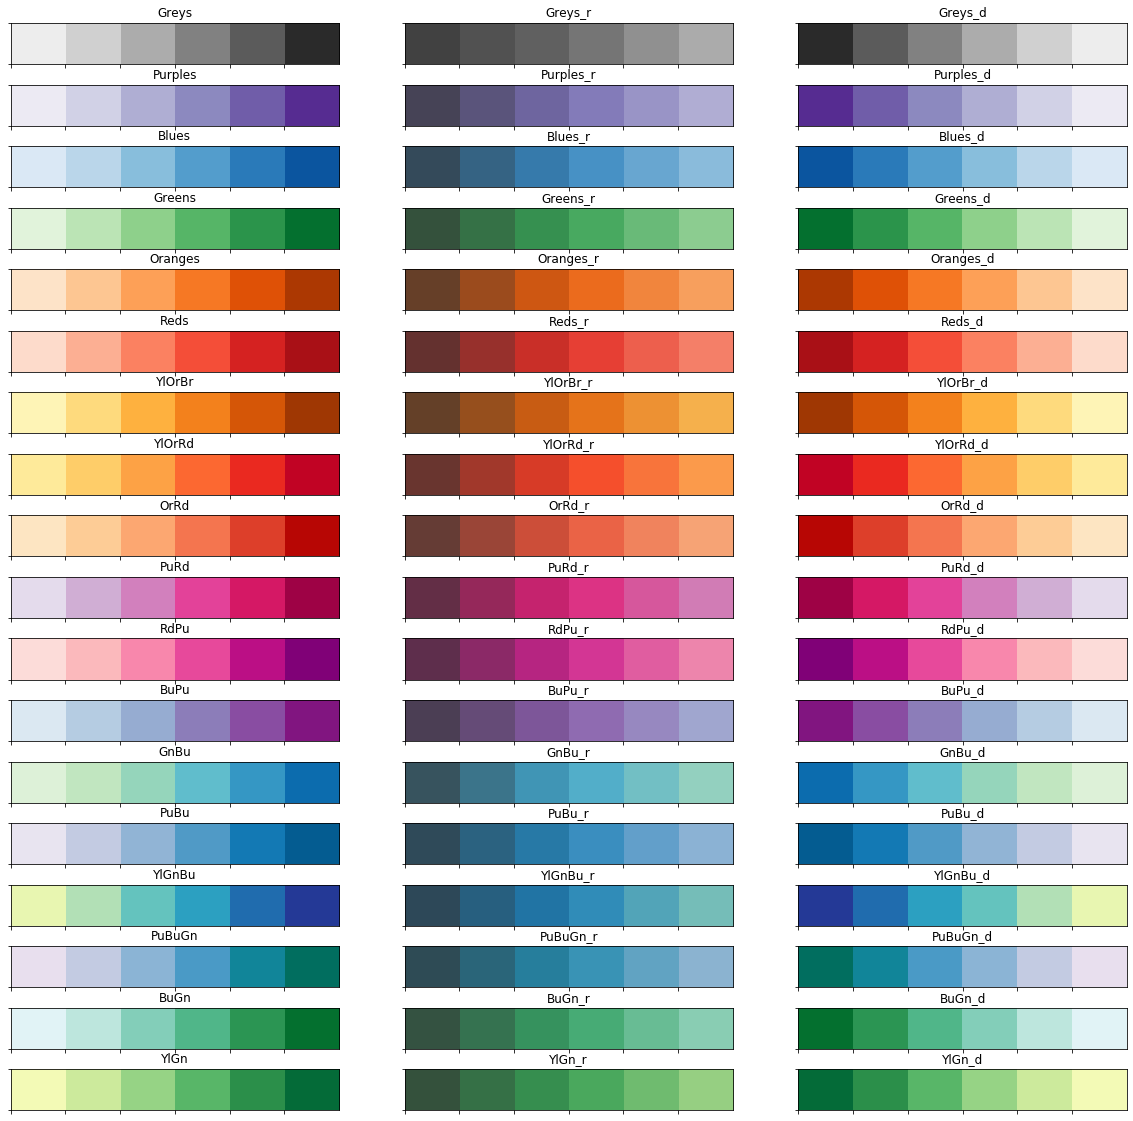

In [12]:
secuencial = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

get_colores(secuencial)

### 5.2. Secuenciales no lineales
Se diferencian de las anteriores porque la función para degradar el brillo y hue son no lineales.Son ideales para representar aglomeraciones de datos en una zona en particular del gráfico

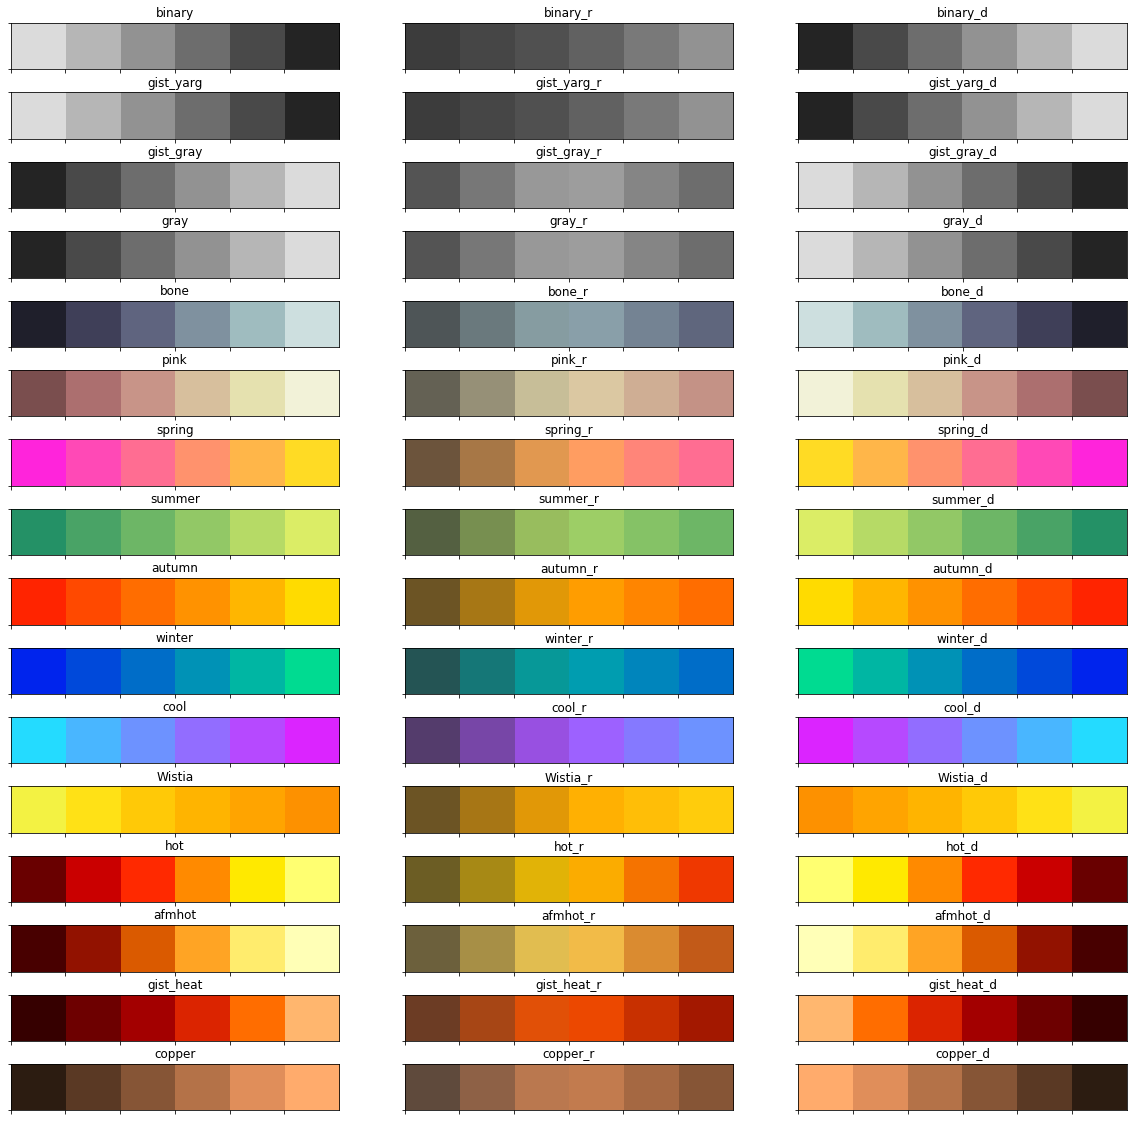

In [13]:
secuencial_nl = ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']

get_colores(secuencial_nl)

### 5.1.Divergentes.
Como su nomrbre lo dice, esta paleta contiene 2 colores en los extremos que van degradándose hasta llegar a una zona neutra en el centro

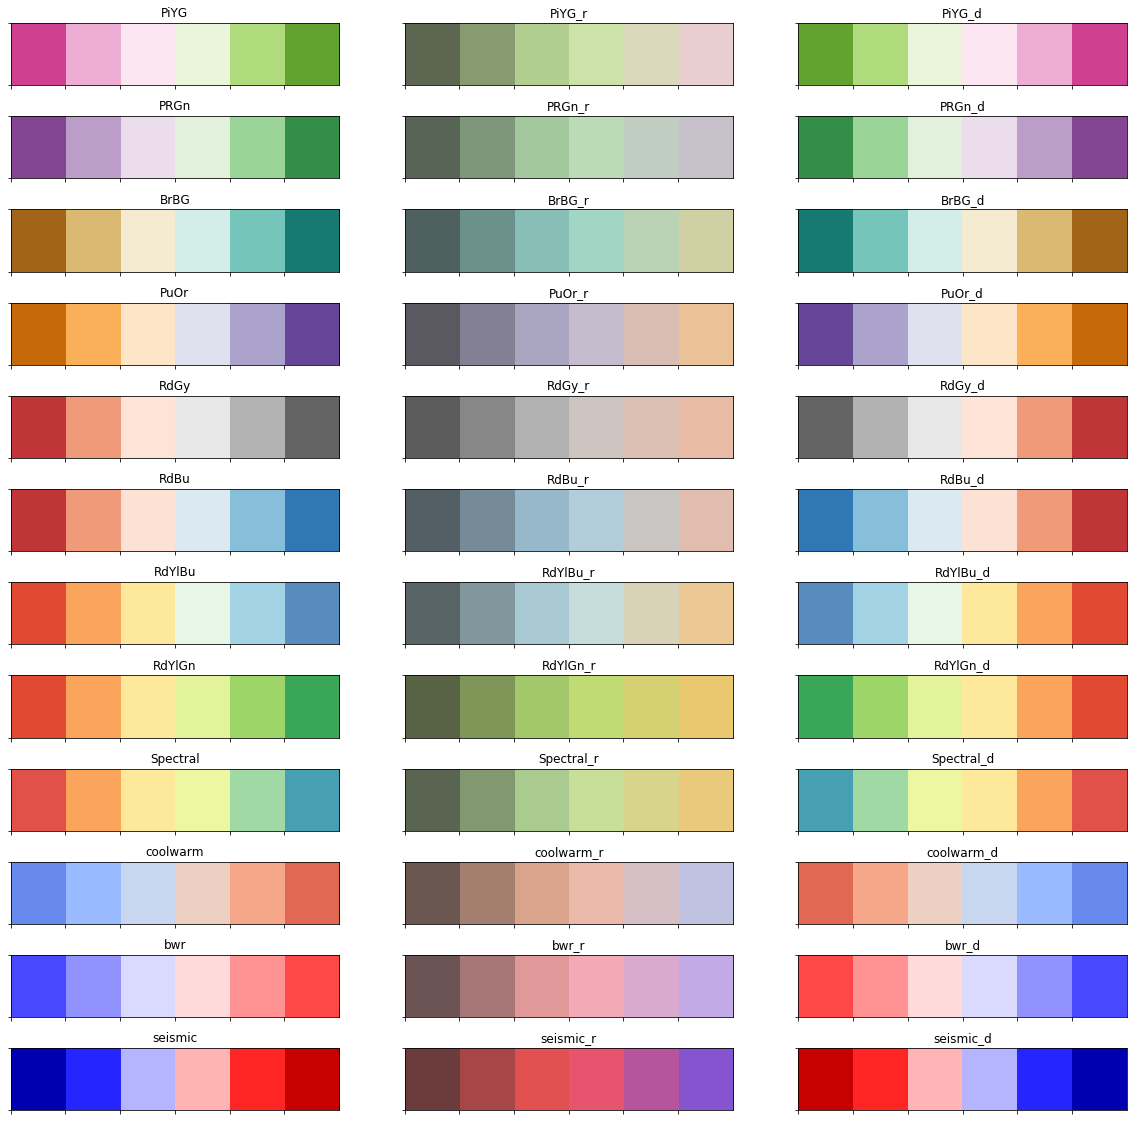

In [15]:
divergente = ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']
get_colores(divergente)

### 5.3 Cubehelix

**Este tipo de paletas son propias de Seaborn y no se encuentran en matplotlib**. Si bien también se produce una degradación lineal, en este tipo de paletas se degrada el brillo y hue, el resultado son combinaciones de colores muy atractivas. En este [link](http://davidjohnstone.net/pages/cubehelix-gradient-picker) puedes entretenerte creando distintas paletas con el método cubehelix de forma muy interactiva

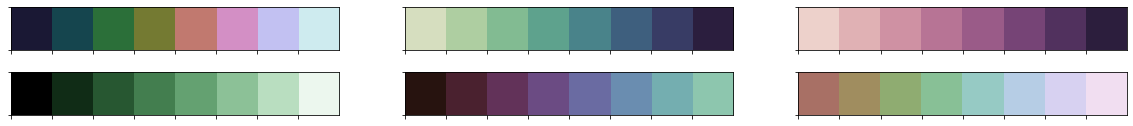

In [108]:
#El primer parámetro da el número de colores
#start, rot, dark y ligth son componentes propios de cubehelix picker.
#Reverse indica el sentido de la paleta

fig = plt.figure(figsize=(20, 2))
gs=  gridspec.GridSpec(2,3,fig,hspace=0.5)


ax=fig.add_subplot(gs[0,0])
palplot(sns.color_palette("cubehelix", 8),ax)

ax=fig.add_subplot(gs[0,1])
palplot(sns.cubehelix_palette(8, start=.5, rot=-.75),ax)

ax=fig.add_subplot(gs[0,2])
palplot(sns.cubehelix_palette(8),ax)


ax=fig.add_subplot(gs[1,0])
palplot(sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True),ax)

ax=fig.add_subplot(gs[1,1])
palplot(sns.cubehelix_palette(8, start=1.3, rot=-1, dark=0.7, light=.1),ax)

ax=fig.add_subplot(gs[1,2])
palplot(sns.cubehelix_palette(8, start=1, rot=2, dark=0.9, light=.5),ax)


## Creación de paletas propias

Una "paleta" no es más que un array con el nombre o código de los colores

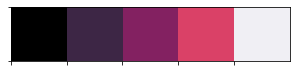

In [112]:
#Escogiendo una paleta al azar de coolors.co
soy_una_paleta =['#000000','#3D2645','#832161','#DA4167','#F0EFF4']
sns.palplot(soy_una_paleta)

De modo que podríamos usar toda nuestra creatividad en buscar combinaciones de colores estéticas para nuestros gráficos. Sin embargo existen métodos que simplifican la vida, en el siguiente caso solo usaré el color #00AED1 

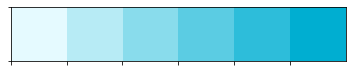

In [113]:
color_favorito='#00AED1'
sns.palplot(sns.light_palette(color_favorito))

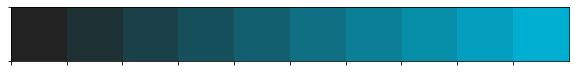

In [115]:
sns.palplot(sns.dark_palette(color_favorito,10))

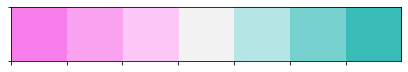

In [165]:
#Acá se debe usar el color en sistema Hsl

hue=190
saturation=100
brillo=82
sns.palplot(sns.diverging_palette(313, 188, s=90, l=70, n=7))


In [ ]:
sns.palplot(sns.dark_palette(color_favorito,10))